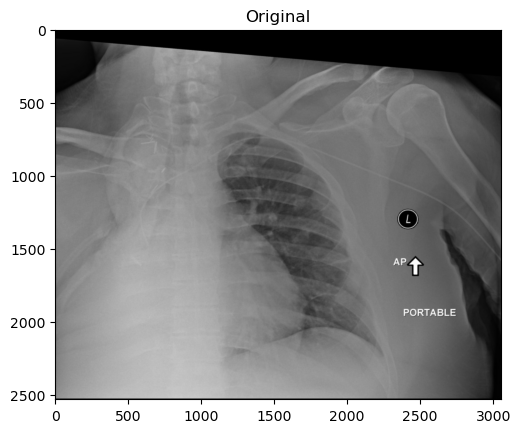

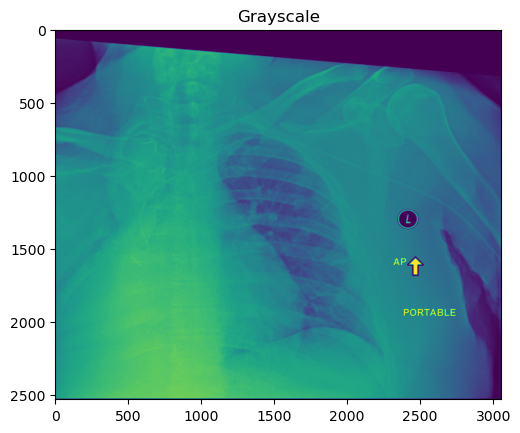

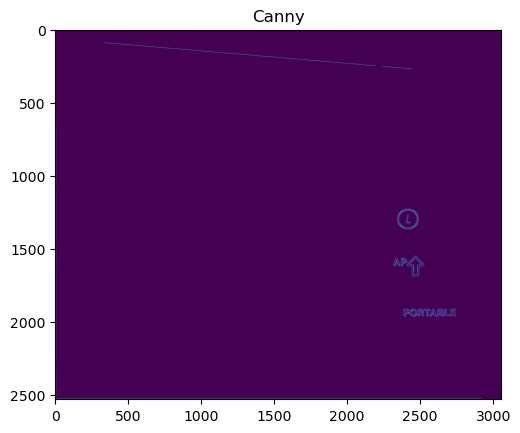

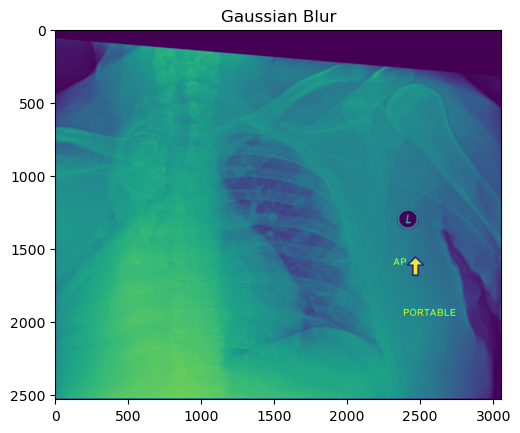

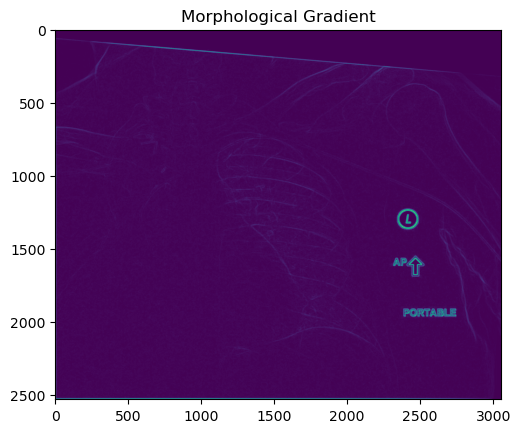

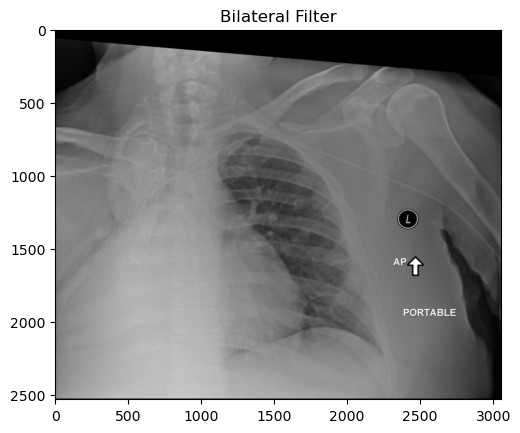

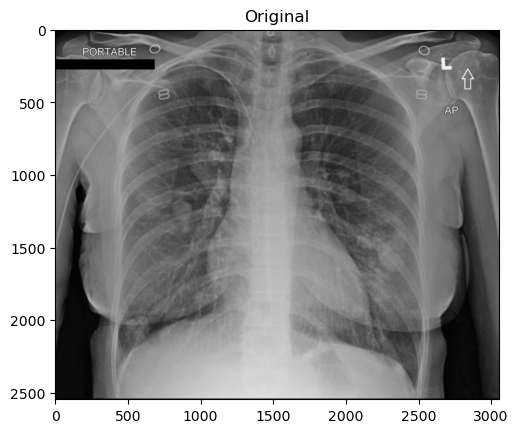

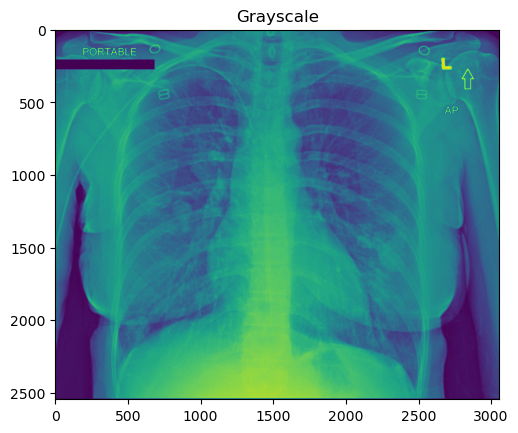

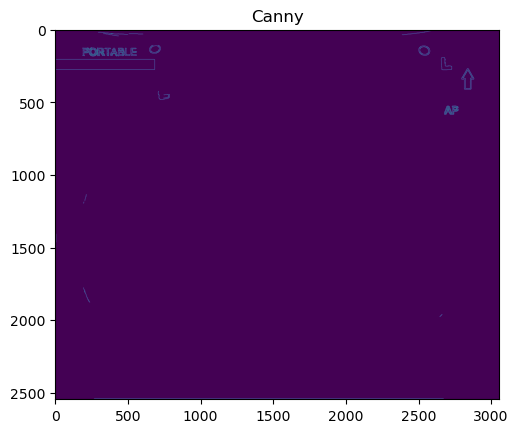

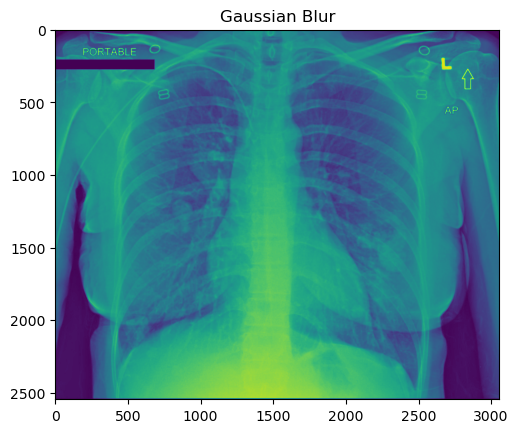

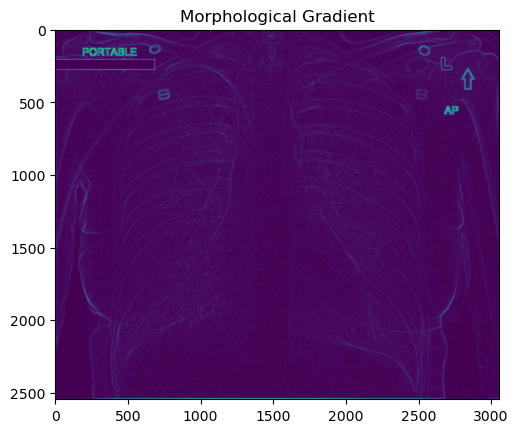

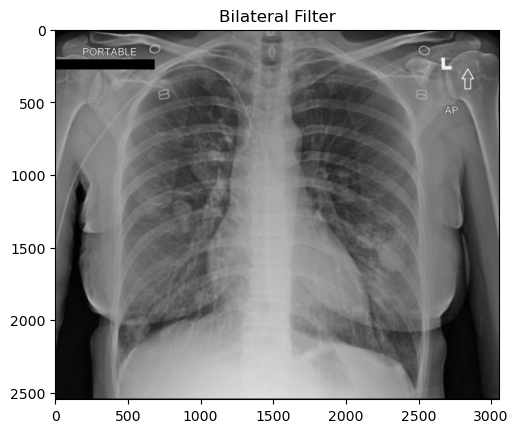

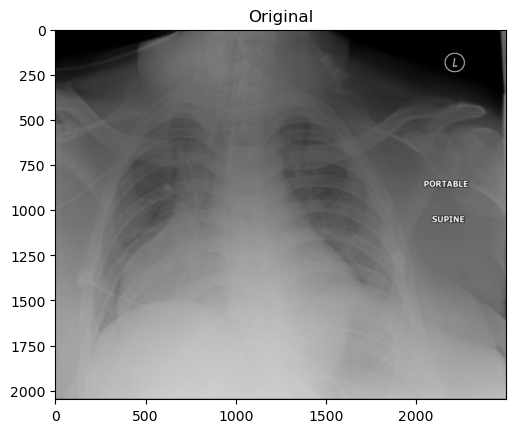

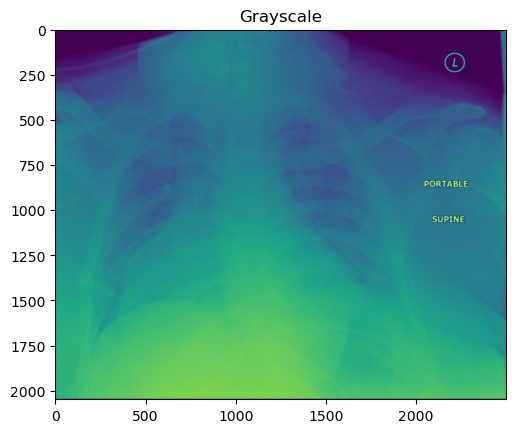

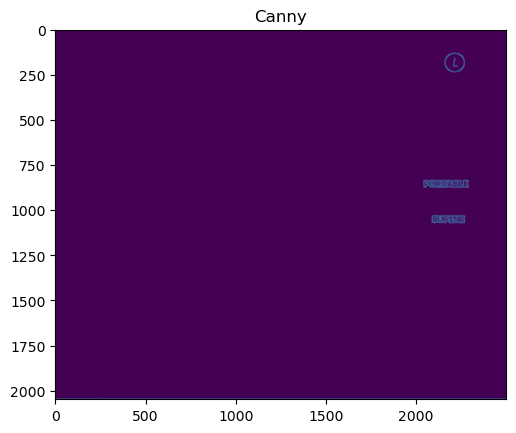

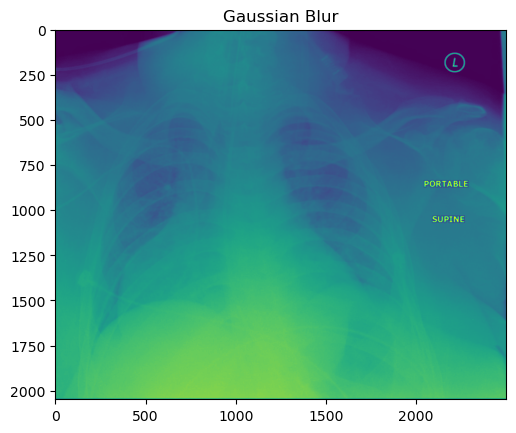

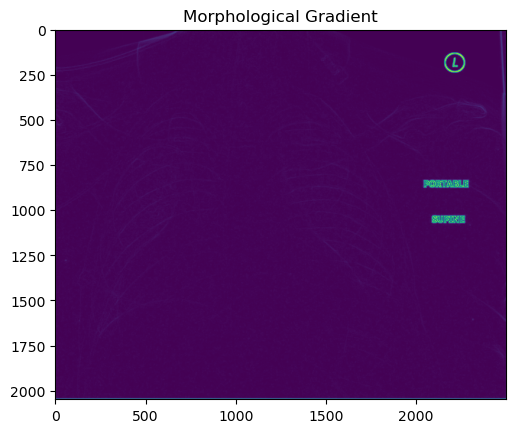

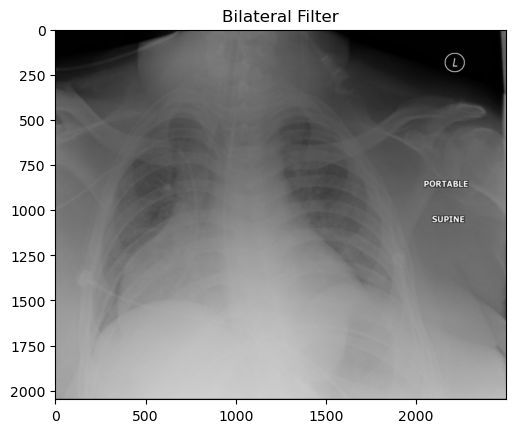

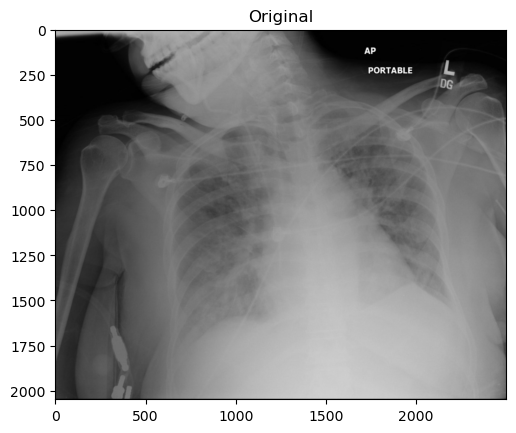

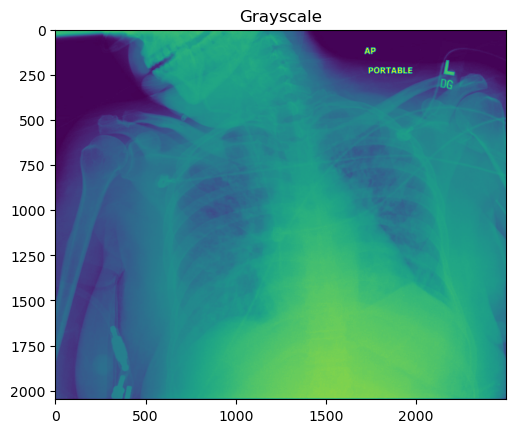

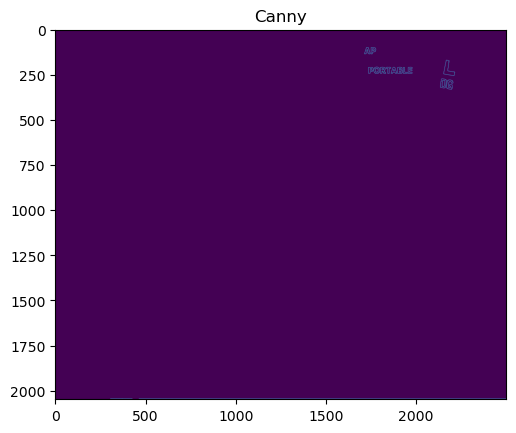

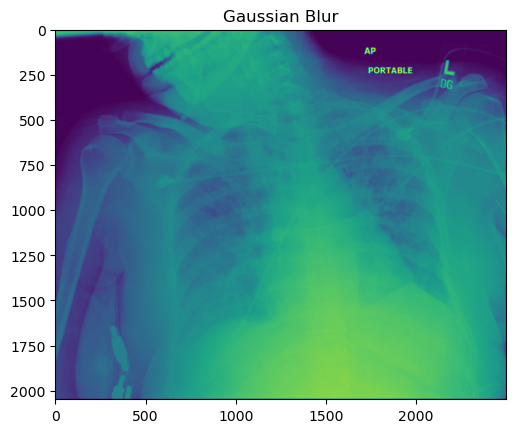

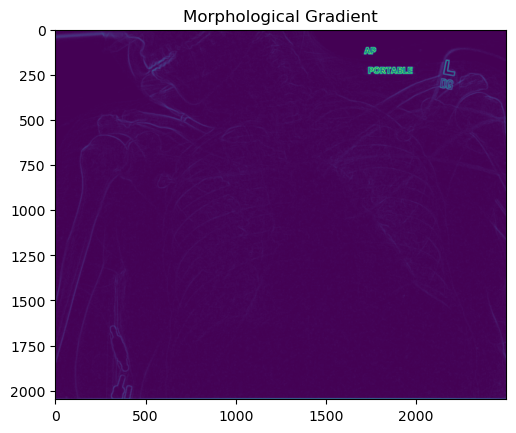

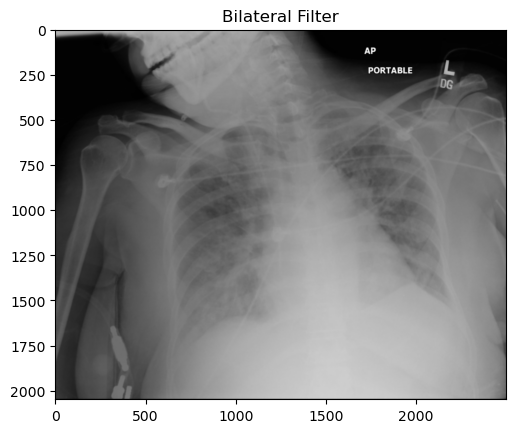

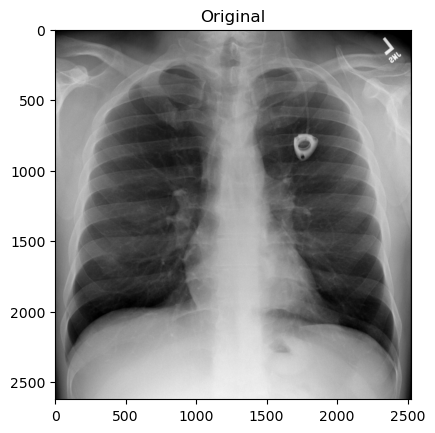

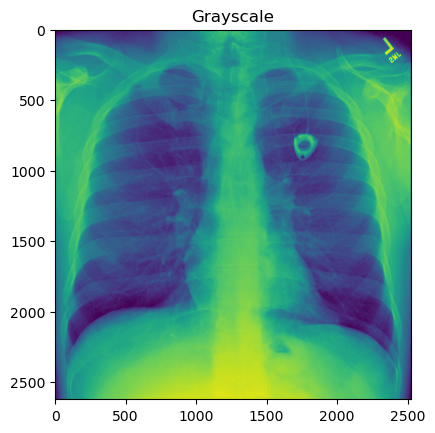

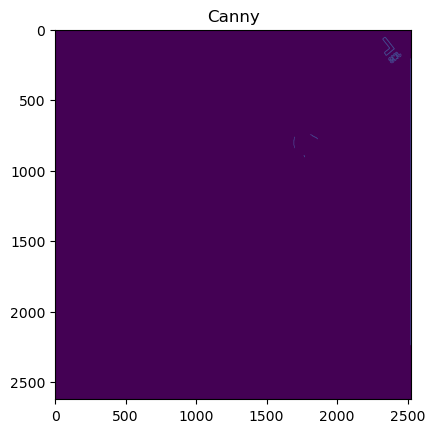

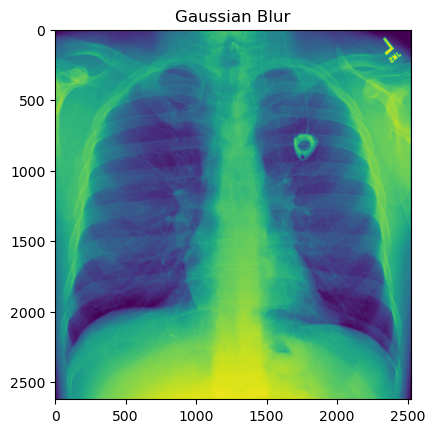

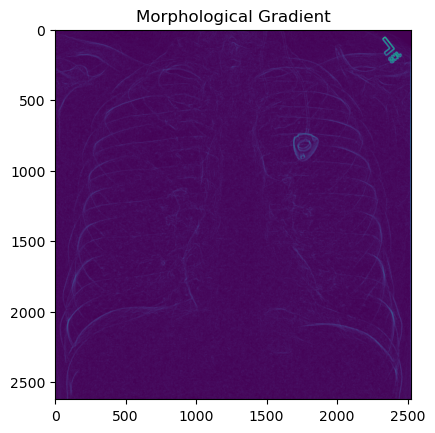

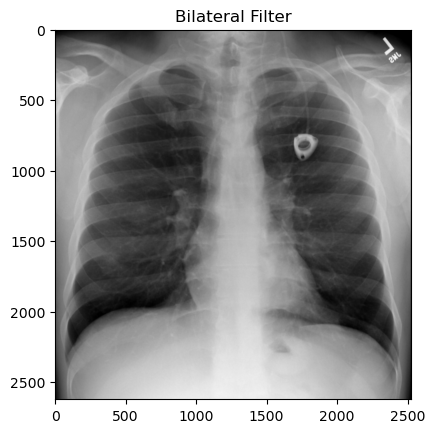

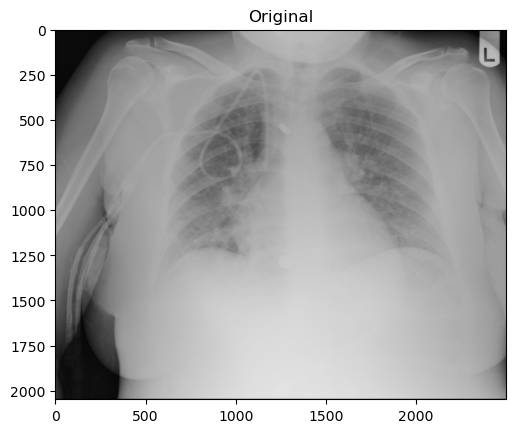

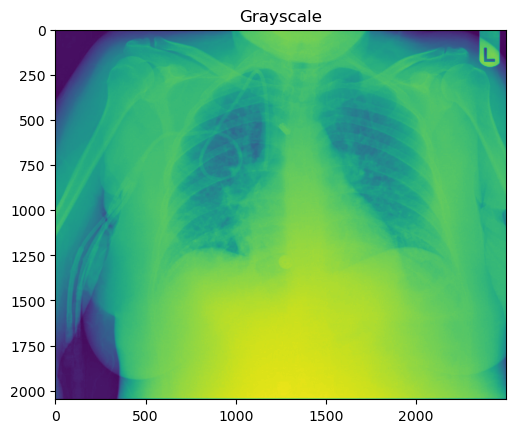

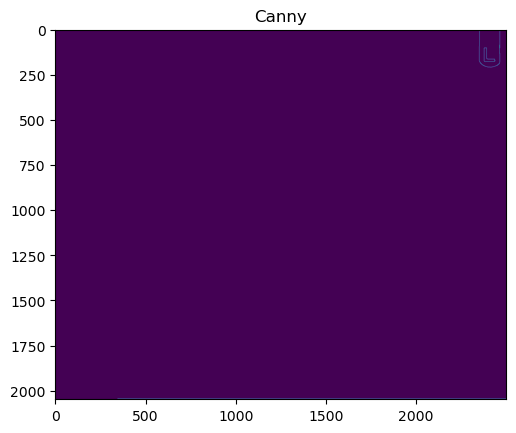

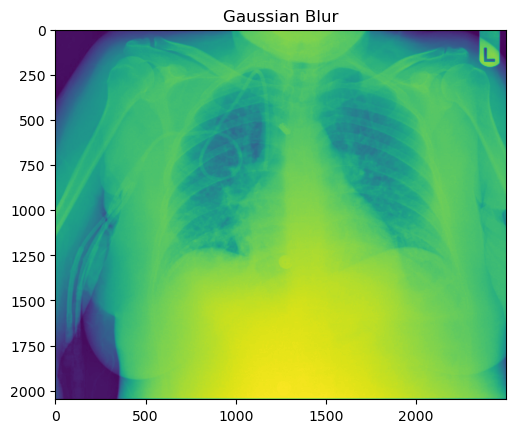

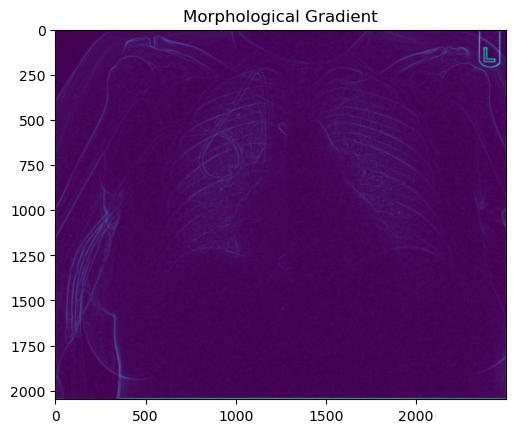

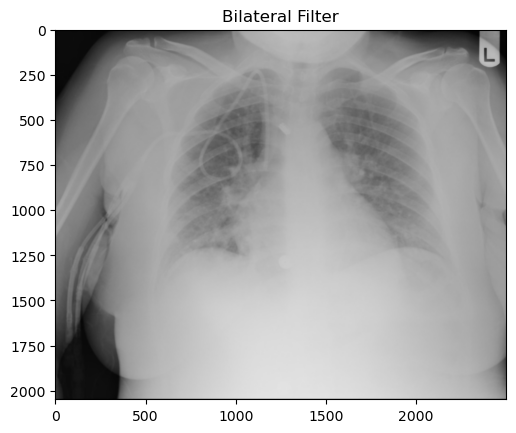

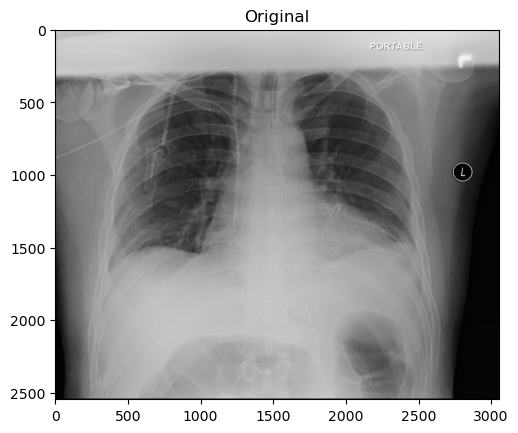

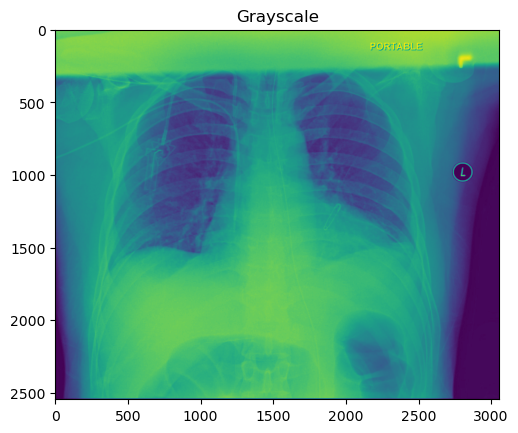

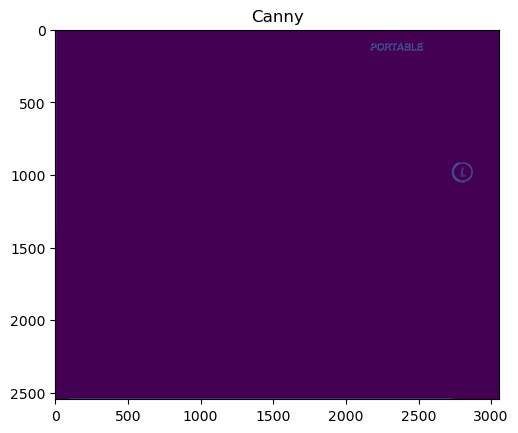

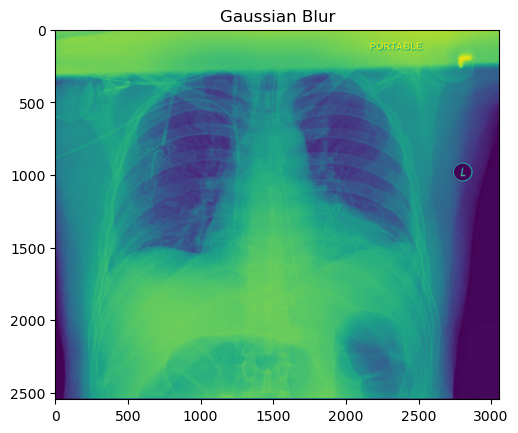

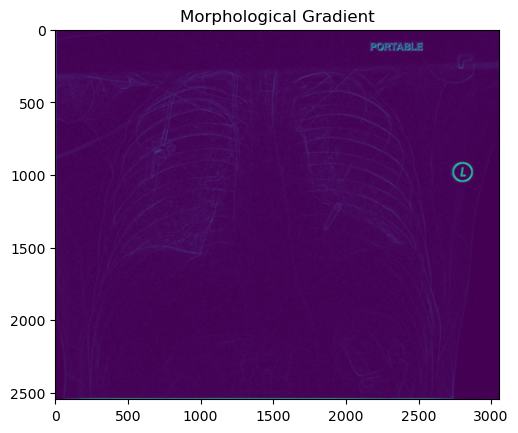

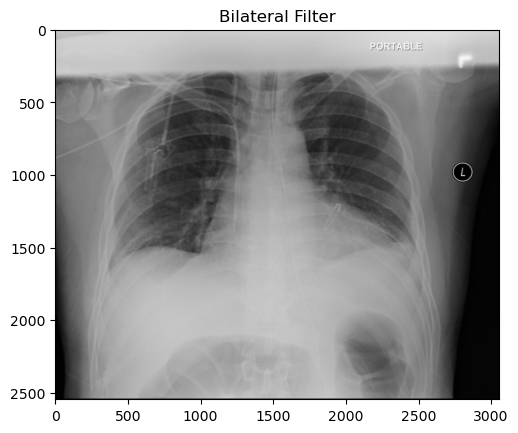

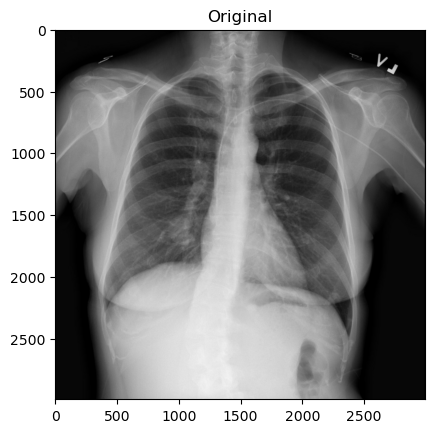

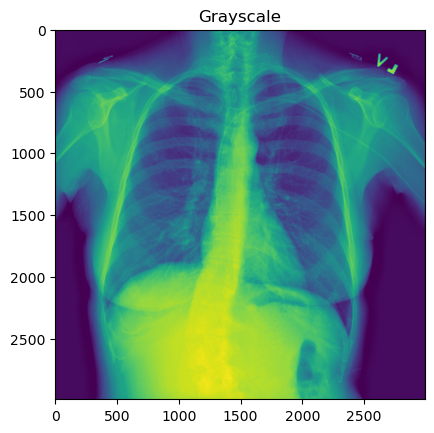

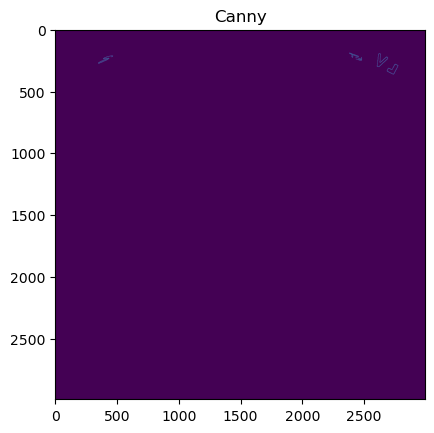

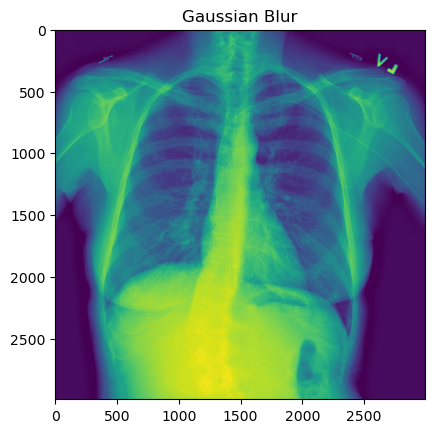

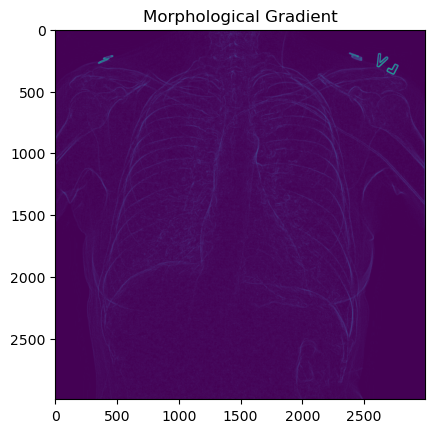

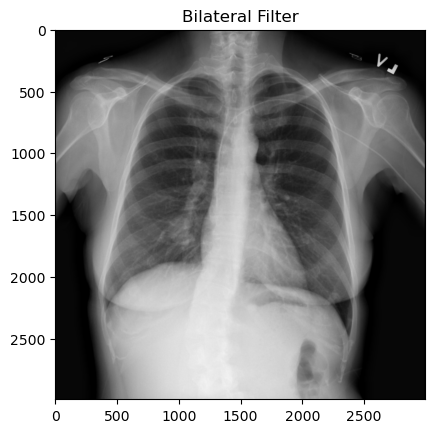

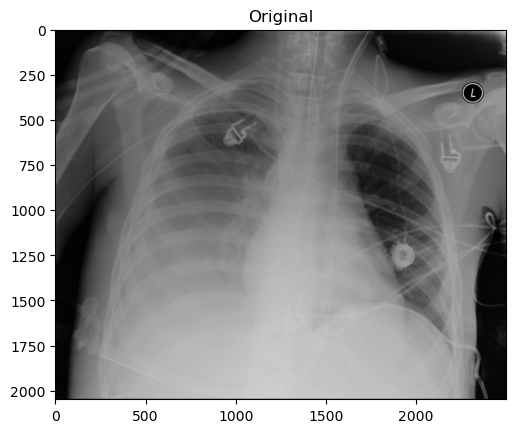

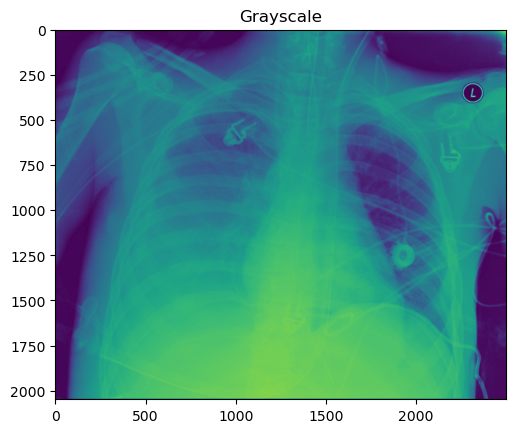

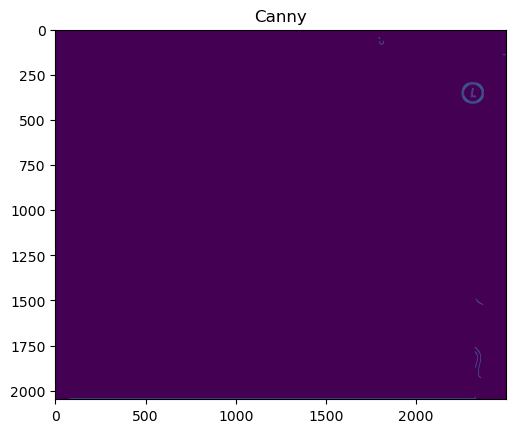

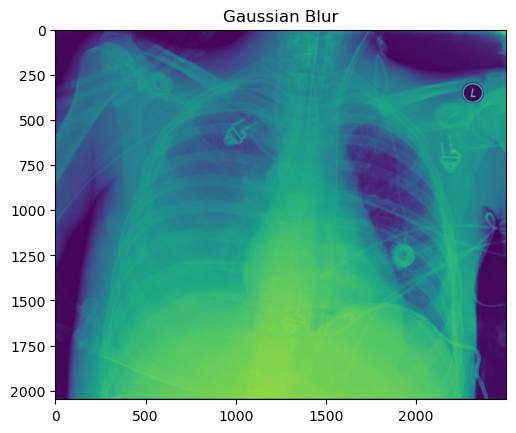

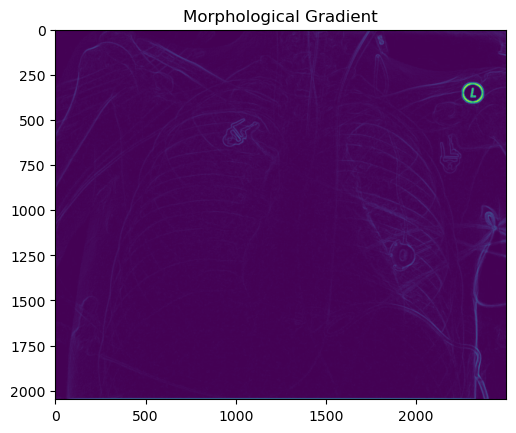

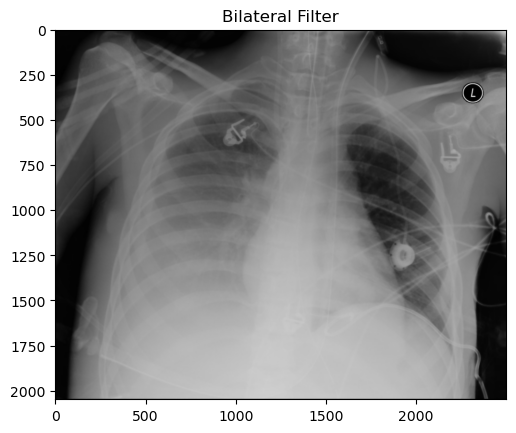

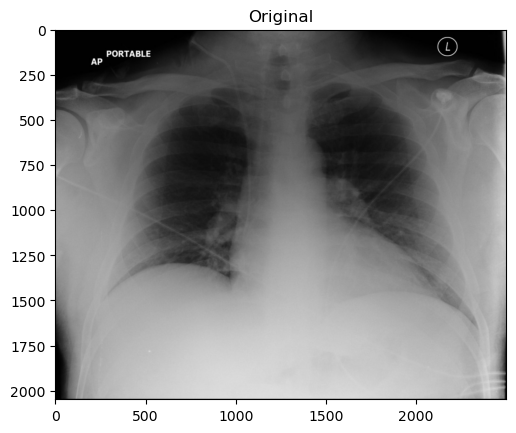

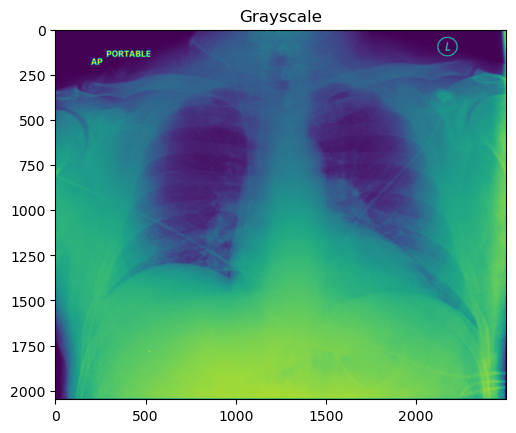

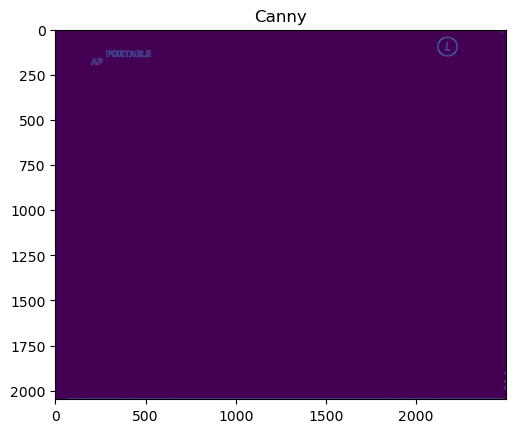

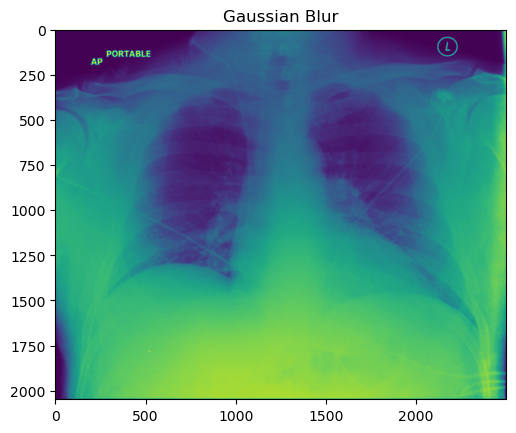

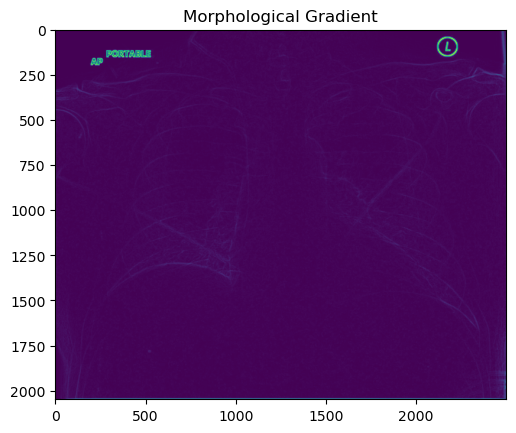

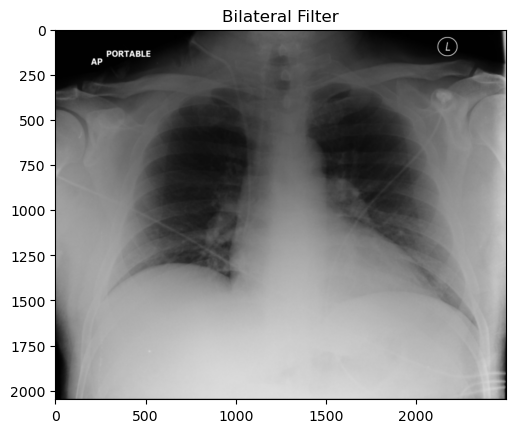

In [3]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Open the zip file
with ZipFile('X- ray image.zip', 'r') as zip:
    # Get the list of all image filenames
    filenames = zip.namelist()

    # Read the images from the zip file
    images = []
    for filename in filenames:
        with zip.open(filename) as file:
            # Read the image as a color image
            img = cv2.imdecode(np.frombuffer(file.read(), np.uint8), cv2.IMREAD_COLOR)
            images.append(img)

# Select 10 random images
random_indices = np.random.choice(len(images), 10, replace=False)
random_images = [images[i] for i in random_indices]

# Apply image processing techniques on the images
processed_images = []
for img in random_images:
    # Convert the image to grayscale if necessary
    if len(img.shape) > 2 and img.shape[2] > 1:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Apply filters and display the images
    filters = [
        ('Original', img),
        ('Grayscale', gray),
        ('Canny', cv2.Canny(gray, 100, 200)),
        ('Gaussian Blur', cv2.GaussianBlur(gray, (5, 5), 0)),
        ('Morphological Gradient', cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, np.ones((5, 5), np.uint8))),
        ('Bilateral Filter', cv2.bilateralFilter(img, 9, 75, 75))
    ]

    for title, result in filters:
        processed_images.append(result)
        plt.title(title)
        plt.imshow(result)
        plt.show()



## Response of each filter on these images.
* Median blur: reduces noise and smooths the image.


* Gaussian blur: blurs the image and reduces noise.


* Thresholding: converts the image to a binary image.


* Canny edge detection: detects edges in the image.


* Morphological transformations (such as erosion, dilation, opening, closing): change the shape of the objects in the image.


* Contrast adjustment: changes the contrast of the image.

* Histogram equalization: improves the contrast of the image.


* Sharpening: enhances the edges in the image.


* Rotation: rotates the image.


* Scaling: changes the size of the image.

* Which filter will you prefer for the detect and visualization of catheters and lines in X-ray images and why?

**There is no single best filter for detecting catheters and lines in X-ray images. The choice of filter will depend on the characteristics of the image and the catheter or line. However, some commonly used filters for catheter and line detection include thresholding, edge detection, and morphological transformations.**

* **How can deep learning help to detect presence of catheters and lines in images and which model you prefer?**

Deep learning can be used to automatically detect the presence of catheters and lines in X-ray images. One popular approach is to use convolutional neural networks (CNNs) to classify whether an image contains a catheter or line, and if so, its position and type.

**One example of a CNN model that can be used for catheter and line detection is YOLO (You Only Look Once). YOLO is a real-time object detection system that can detect multiple objects in an image and provide their bounding boxes and class labels. It has been successfully used for detecting catheters and lines in medical images.**